In [1]:
import torch as th

from main import Diffusion # import the main PTL module class

In [2]:
# the saved checkpoint
CKPT_PATH = "./logs/test/version_7/checkpoints/epoch=299-step=14700.ckpt"

diffusion = Diffusion.load_from_checkpoint(
    CKPT_PATH
)

In [5]:
from tqdm import trange

N = 1024
B = 256

with diffusion.metrics():
    for _ in trange(N // B):
        diffusion.record_fake_data_for_FID(
            diffusion.sample(batch_size = B, num_inference_steps = 1000)
        )
    print(diffusion.FID)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [07:42<00:00, 115.54s/it]


tensor(56.4418, device='cuda:0')


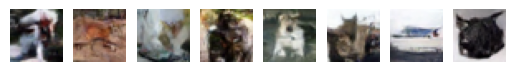

In [6]:
import matplotlib.pyplot as plt

images = diffusion.sample(batch_size = 8)

fig, axes = plt.subplots(1, 8)
for i, ax in enumerate(axes):
    ax.imshow(images[i]) # visualize
    ax.axis('off')

In [7]:
# .. or convert back to huggingface format
diffusion.save_pretrained('./our_cifar10_model')